## Data prep
## Veri Hazırlığı

In [31]:
import yfinance as yf
import numpy as np 

In [59]:
df=yf.download("AAPL",start="2018-01-01")

[*********************100%***********************]  1 of 1 completed


In [60]:
df["returns"]=np.log(df.Close.pct_change()+1)

In [61]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df["Lag_"+str(i)]=df["returns"].shift(i)
        names.append("Lag_"+str(i))
    return names

In [62]:
lagnames=lagit(df,5)

In [63]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776520,102223600,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769428,118071600,-0.000174,NaN,NaN,NaN,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958794,89738400,0.004634,-0.000174,NaN,NaN,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425125,94640000,0.011321,0.004634,-0.000174,NaN,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271252,82271200,-0.003721,0.011321,0.004634,-0.000174,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500,-0.008995,0.005298,-0.017404,-0.049211,-0.007349,-0.015611
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900,-0.001235,-0.008995,0.005298,-0.017404,-0.049211,-0.007349
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100,-0.001012,-0.001235,-0.008995,0.005298,-0.017404,-0.049211


In [64]:
df.dropna(inplace=True)

## Model building, fitting & prediction
## Model Oluşturma, Uyarlama ve Tahmin

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()

In [67]:
model.fit(df[lagnames],df["returns"])

LinearRegression()

## Strategy, Performance and Visualization
## Strateji, Performans ve Görselleştirme

In [68]:
df["prediction_LR"]=model.predict(df[lagnames])

In [69]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.257046,95839600,-0.000230,-0.000115,-0.003721,0.011321,0.004634,-0.000174,0.000924
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.491398,74670800,0.005664,-0.000230,-0.000115,-0.003721,0.011321,0.004634,0.001316
2018-01-12,44.044998,44.340000,43.912498,44.272499,41.919865,101672400,0.010273,0.005664,-0.000230,-0.000115,-0.003721,0.011321,0.001005
2018-01-16,44.474998,44.847500,44.035000,44.047501,41.706818,118263600,-0.005095,0.010273,0.005664,-0.000230,-0.000115,-0.003721,-0.000182
2018-01-17,44.037498,44.812500,43.767502,44.775002,42.395660,137547200,0.016381,-0.005095,0.010273,0.005664,-0.000230,-0.000115,0.001469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500,-0.008995,0.005298,-0.017404,-0.049211,-0.007349,-0.015611,0.000723
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900,-0.001235,-0.008995,0.005298,-0.017404,-0.049211,-0.007349,0.002160
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100,-0.001012,-0.001235,-0.008995,0.005298,-0.017404,-0.049211,-0.000866


In [70]:
df["direction_LR"]=[1 if i > 0 else -1 for i in df.prediction_LR]

In [71]:
df["strat_LR"]=df["direction_LR"]*df["returns"]

In [72]:
np.exp(df[["returns","strat_LR"]].sum())

returns     4.084093
strat_LR    3.691328
dtype: float64

<Axes: xlabel='Date'>

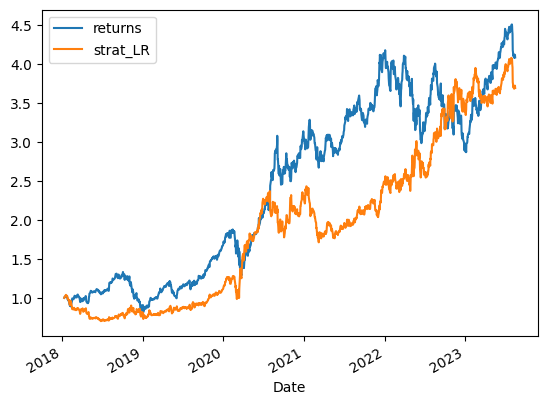

In [73]:
np.exp(df[["returns","strat_LR"]].cumsum()).plot()

## Overfitting and avoiding with train test split
## Aşırı Uydurma ve Eğitim ve Test Verisi Ayırımı ile Önleme

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train,test=train_test_split(df,shuffle=False,test_size=0.3,random_state=0)

In [76]:
train=train.copy()

In [77]:
test=test.copy()

In [78]:
model=LinearRegression() 

In [79]:
model.fit(train[lagnames],train["returns"])

LinearRegression()

In [80]:
test["prediction_LR"] = model.predict(test[lagnames])

In [81]:
test["direction_LR"]=[1 if i >0 else -1 for i in test.prediction_LR]

In [82]:
test["strat_LR"]=test["direction_LR"]*test["returns"]

In [83]:
np.exp(test[["returns","strat_LR"]].sum())

returns     1.039812
strat_LR    1.434466
dtype: float64

In [84]:
(test["direction_LR"].diff() !=0).value_counts()

False    235
True     188
Name: direction_LR, dtype: int64

<Axes: xlabel='Date'>

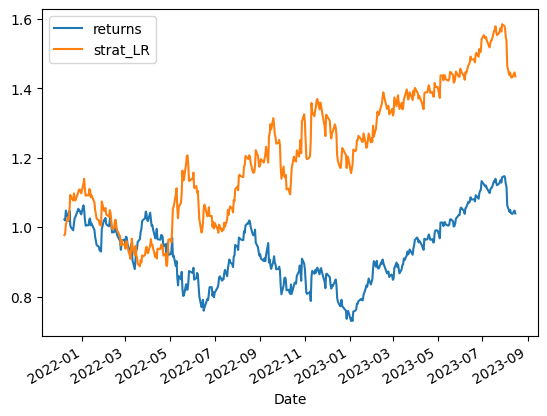

In [85]:
np.exp(test[["returns","strat_LR"]].cumsum()).plot()